## Strava Activity Analysis

Import activity data with Strava's API

In [1]:
import json
import requests
import urllib3
import pandas as pd
from pandas.io.json import json_normalize
import calendar 

#data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

#configuration file containing API secrets
import strava_config as cfg

pd.set_option('display.max_columns', None)

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

auth_url = "https://www.strava.com/oauth/token"
activities_url = "https://www.strava.com/api/v3/athlete/activities"

#get config data from "strava_config" file 
payload = {
    'client_id': cfg.secrets['client_id'],
    'client_secret': cfg.secrets['client_secret'],
    'refresh_token': cfg.secrets['refresh_token'],
    'grant_type': "refresh_token",
    'f': 'json'
}

#using strava config data, get a new access token  
print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

#using the access token, request 200 activities (max allowed), add to "activities" list
#increment page by 1, get next 200 break if 

header = {'Authorization': 'Bearer ' + access_token}

activities = []
page = 1
per_page = 200

while True:
    params = {'page': page, 'per_page': per_page}
    json_dataset = requests.get(activities_url, headers=header, params=params).json()
    activities += json_dataset
    if len(json_dataset) < per_page:
        break
    page += 1

print(f"Retrieved {len(activities)} activities.")

#load the nested JSON list into a Pandas DataFrame
df = json_normalize(activities)

df.head(3)

Requesting Token...

Access Token = addec9a3d6e72486fdd88f1381c4e516e638a36f

Retrieved 731 activities.


C:\Users\hw501f\AppData\Local\Temp\ipykernel_28652\1203662628.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = json_normalize(activities)


,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,start_date,start_date_local,timezone,utc_offset,location_city,location_state,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,trainer,commute,manual,private,visibility,flagged,gear_id,start_latlng,end_latlng,average_speed,max_speed,average_watts,device_watts,kilojoules,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,max_watts,weighted_average_watts,average_cadence,average_temp
0,2,Afternoon Ride,10881.7,2063,3750,62.0,Ride,Ride,10.0,13419108948,2025-01-21T23:38:02Z,2025-01-21T15:38:02Z,(GMT-08:00) America/Los_Angeles,-28800.0,None,None,None,6,3,0,1,0,False,False,False,False,everyone,False,b11998419,"[47.654385, -122.358772]","[47.65483, -122.359399]",5.275,8.85,124.8,False,257.5,True,104.4,128.0,False,True,40.1,7.9,14313155393,14313155393,garmin_ping_404362649116,False,1,1,False,65056010,1,a13419108948,mkzaHdgyiVTFT@|@BJMBKViAZiCNa@NGtA?d@DXGTMTSPY...,2,NaN,NaN,NaN,NaN
1,2,Zwift - Figure 8 in Watopia,10340.8,1310,1310,87.0,VirtualRide,VirtualRide,NaN,13416301841,2025-01-21T18:17:29Z,2025-01-21T10:17:29Z,(GMT-08:00) America/Los_Angeles,-28800.0,None,None,None,1,1,0,22,0,False,False,False,False,everyone,False,None,"[-11.639242, 166.948489]","[-11.638879, 166.957276]",7.894,12.64,147.3,True,192.9,True,103.2,130.0,False,True,57.8,-6.2,14310187275,14310187275,zwift-activity-1791595299978870784.fit,False,0,0,False,65056010,1,a13416301841,hh`fA_c~y^SIUOGAQMoBi@MA]MkAYOEOIOCgBaAk@]w@i@...,2,268.0,155.0,NaN,NaN
2,2,Afternoon Run,3366.6,1087,1111,60.9,Run,Run,0.0,13409766405,2025-01-20T23:25:34Z,2025-01-20T15:25:34Z,(GMT-08:00) America/Los_Angeles,-28800.0,None,None,None,2,3,0,1,0,False,False,False,False,everyone,False,g19856338,"[47.655291, -122.360763]","[47.654908, -122.360489]",3.097,5.30,NaN,NaN,NaN,True,130.1,145.0,False,True,49.6,12.2,14303121717,14303121717,garmin_ping_404069184638,False,0,0,False,65056010,1,a13409766405,u|zaHnqyiVQDeC?i@FS`@wAEi@@k@Ca@FEA[@{B?K@MAq@...,2,NaN,NaN,79.4,NaN


Now that we have successfully loaded our activities from Strava's API, we should take a look at what columns are interesting, see if there any transformations  

### 2. Clean data

In [2]:
# check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] #filter to just print missing values
missing_values

# df[df.isna().any(axis=1)]

workout_type              162
location_city             731
location_state            731
location_country          731
gear_id                   172
average_watts             266
device_watts              258
kilojoules                266
average_heartrate         215
max_heartrate             215
max_watts                 704
weighted_average_watts    704
average_cadence           498
average_temp              692
dtype: int64

 14 Missing values for cadence, heartrate, and gear are spread from 2020-2022. <br>
 These are missing because I did not record my activities with a garmin watch so I should keep these observations in mind

In [3]:
import polyline

def preprocess_data(df):        
    
    #decode polyline into list of coordinates for each route.
    polylines = [activity["map"]["summary_polyline"] for activity in activities]

    coordinates = [polyline.decode(polyline_str) for polyline_str in polylines]

    df['coordinates'] = coordinates
    
    # subset dataframe to include just running activities
    df = df[df['sport_type'] == "Run"].reset_index(drop=True)
    
    #subset df to columns of interest
    df = df[['name','distance','moving_time','elapsed_time','total_elevation_gain',
       'sport_type','comment_count','average_speed','max_speed','average_cadence',
      'has_heartrate','average_heartrate','max_heartrate','upload_id','gear_id','pr_count',
            'start_date', 'start_date_local','coordinates']]
    
    #Unit conversions
    df['distance'] = df["distance"] * 0.000621371 #meters to miles
    df['total_elevation_gain'] = df["total_elevation_gain"] * 3.28084 #meters to feet

    df["elapsed_time"] = df["elapsed_time"]/60 #seconds to minutes
    df["moving_time"] = df["moving_time"]/60

    df["average_speed"] = df["average_speed"] * 2.23694 #meters/second to miles/hour
    df["max_speed"] = df["max_speed"] * 2.23694 

    #create mile pace
    df['mile_pace'] = df['moving_time']/df['distance'] 

    #Time columns
    df.start_date = pd.to_datetime(df.start_date)
    df.start_date_local = pd.to_datetime(df.start_date_local)

    df['day_of_week'] = df['start_date_local'].dt.day_name()
    df['year'] = df['start_date_local'].dt.year
    df['month'] = df['start_date_local'].dt.month
    df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])
    df['day'] = df['start_date_local'].dt.day
    df['hour'] = df['start_date_local'].dt.hour
    df['time'] = df['start_date_local'].dt.time
    df['date'] = df['start_date_local'].dt.date
    df['week'] = df['start_date_local'].dt.week

    #add weekend dummy
    df['weekend'] = (df['start_date'].dt.dayofweek >= 5).astype(int)

    #rename cols to include units and add detail
    col_map = {
        'name': 'activity_name',
        'id': 'activity_id',
        'distance': 'distance_miles',
        'moving_time': 'moving_time_min',
        'elapsed_time': 'elapsed_time_min',
        'average_heartrate': 'avg_heart_rate_bpm',
        'max_heartrate': 'max_heart_rate_bpm',
        'average_speed': 'avg_speed_mph',
        'max_speed': 'max_speed_mph',
        'average_temp': 'avg_temp_celsius',
        'average_watts': 'avg_power_watts',
        'total_elevation_gain': 'total_elevation_gain_ft',
    }

    df = df.rename(columns=col_map)

    #replace gear_id with gear name
    df['gear_id'] = df['gear_id'].replace(['b11998419', 'b11294998', 'b11590951', 'b11671431','g16236465','g17855870','g19856338'],
                                          ['LHT', 'Grocery_machine', 'Alduin', 'Peugeot','Brooks G14','Hoka Clifton 9','Saucony Ride 17'])

    return df

#call preprocessing function
# df = pd.read_csv("clean_strava.csv")
df = preprocess_data(df)

df.head(3)

C:\Users\hw501f\AppData\Local\Temp\ipykernel_28652\3458705784.py:46: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['start_date_local'].dt.week


,activity_name,distance_miles,moving_time_min,elapsed_time_min,total_elevation_gain_ft,sport_type,comment_count,avg_speed_mph,max_speed_mph,average_cadence,has_heartrate,avg_heart_rate_bpm,max_heart_rate_bpm,upload_id,gear_id,pr_count,start_date,start_date_local,coordinates,mile_pace,day_of_week,year,month,month_name,day,hour,time,date,week,weekend
0,Afternoon Run,2.091908,18.116667,18.516667,199.803156,Run,0,6.927803,11.855782,79.4,True,130.1,145.0,14303121717,Saucony Ride 17,0,2025-01-20 23:25:34+00:00,2025-01-20 15:25:34+00:00,"[(47.65659, -122.36072), (47.65668, -122.36075...",8.660357,Monday,2025,1,January,20,15,15:25:34,2025-01-20,4,0
1,Afternoon Run,7.861027,66.600000,75.750000,381.889776,Run,0,7.082152,13.347821,80.0,True,141.3,163.0,14294315501,Saucony Ride 17,3,2025-01-19 22:52:49+00:00,2025-01-19 14:52:49+00:00,"[(47.65425, -122.36022), (47.65418, -122.36072...",8.472176,Sunday,2025,1,January,19,14,14:52:49,2025-01-19,3,1
2,Morning Run,6.673214,53.700000,64.533333,264.763788,Run,0,7.455721,15.249220,81.0,True,143.3,166.0,14282523910,Saucony Ride 17,1,2025-01-18 18:41:18+00:00,2025-01-18 10:41:18+00:00,"[(47.65416, -122.36017), (47.65411, -122.36058...",8.047097,Saturday,2025,1,January,18,10,10:41:18,2025-01-18,3,1


### 3. Analyze data

In [4]:
df.groupby('year').size()

year
2020      9
2021      4
2022      1
2023      3
2024    184
2025     14
dtype: int64

One of my favorite visualizations is the pairplot. It helps me build intuition for many numerical columns at once to inform where I can look for interesting trends. Below i'll look

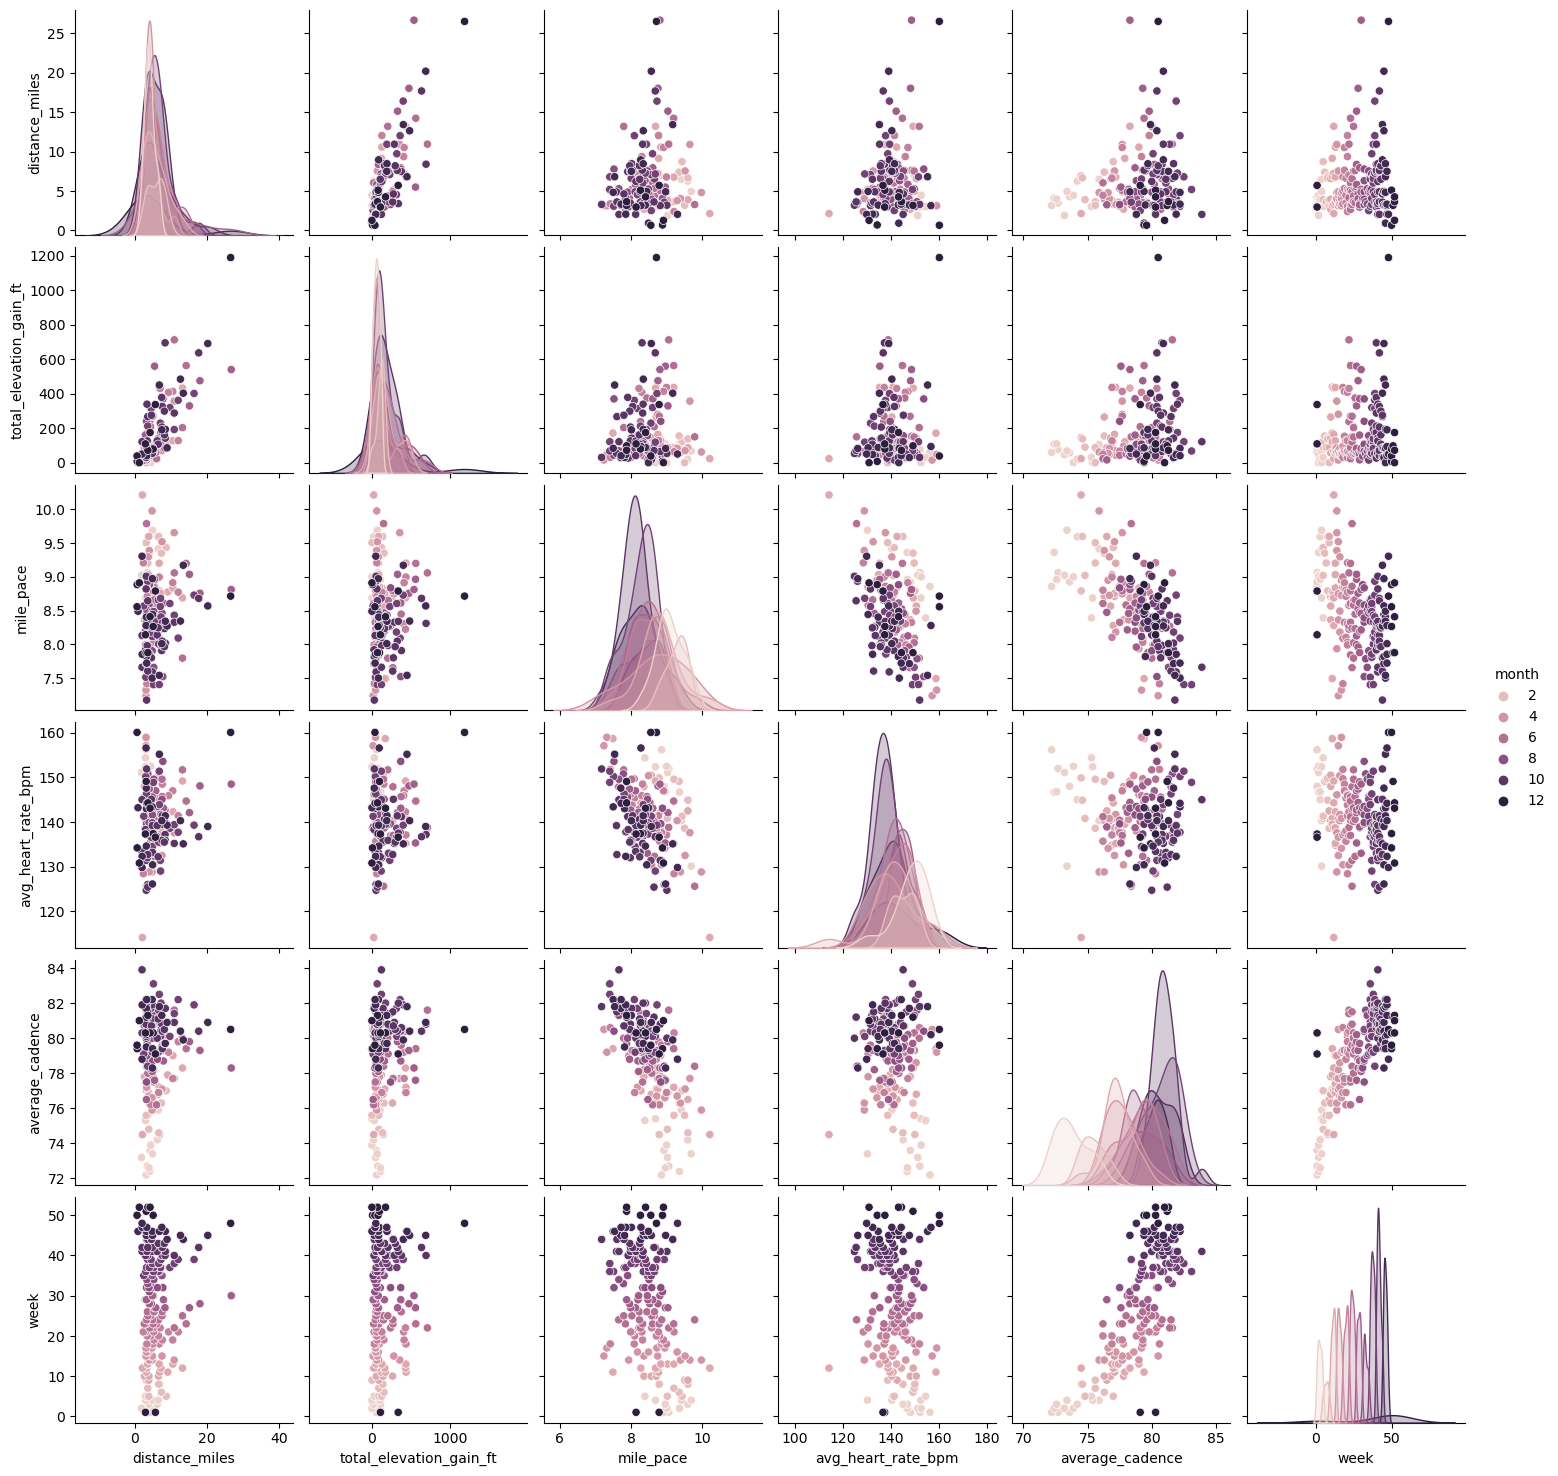

In [15]:
# create a pairplot to visualize the relationships between multiple numeric columns.
sns.pairplot(df[df['year'] == 2024], vars=['distance_miles', 'total_elevation_gain_ft',
                       'mile_pace','avg_heart_rate_bpm','average_cadence','week'], hue = 'month')

### Observations from pairplot:
1. There is a negative relationship between pace and heartrate (slower pace, lower heartrate)
2. Average cadence appears to climb over time, but so does average pace. **It would be interesting to know if my cadence has changed over time or if it is linked to pace.** 
3. The majority of runs are under 5 miles and have < 100 ft of gain.
4. Longer runs tend to have more elevation gain; small positive correlation between distance and elevation gain

In [6]:
df.describe()

,distance_miles,moving_time_min,elapsed_time_min,total_elevation_gain_ft,comment_count,avg_speed_mph,max_speed_mph,average_cadence,avg_heart_rate_bpm,max_heart_rate_bpm,upload_id,pr_count,mile_pace,year,month,day,hour,week,weekend
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,201.000000,201.000000,201.000000,2.150000e+02,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,5.642428,48.162403,53.402326,160.253011,0.209302,7.073267,13.586695,79.024378,141.019403,158.283582,1.229295e+10,2.404651,8.519431,2023.818605,6.697674,15.195349,14.800000,26.911628,0.325581
std,3.829555,33.500759,39.343588,164.263423,0.734915,0.467214,3.956182,2.390659,7.757988,9.921904,2.124071e+09,3.518838,0.560869,0.951942,3.660441,8.719887,3.245702,16.043650,0.469685
min,0.646661,5.533333,5.933333,0.000000,0.000000,5.876441,6.502785,71.200000,114.100000,125.000000,4.712350e+09,0.000000,7.175208,2020.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,3.251417,27.433333,27.933333,52.493440,0.000000,6.771217,10.409600,77.700000,136.400000,152.000000,1.188856e+10,0.000000,8.140498,2024.000000,4.000000,7.500000,13.500000,13.000000,0.000000
50%,4.780331,38.300000,40.683333,95.800528,0.000000,7.053072,12.750558,79.400000,140.600000,158.000000,1.268681e+10,1.000000,8.507368,2024.000000,7.000000,15.000000,16.000000,27.000000,0.000000
75%,6.966439,60.216667,64.300000,207.349088,0.000000,7.370717,15.925894,80.700000,145.900000,165.000000,1.349009e+10,4.000000,8.860735,2024.000000,10.000000,23.000000,17.000000,41.000000,1.000000
max,26.673220,235.050000,237.000000,1188.320248,6.000000,8.361682,26.087194,83.900000,160.100000,184.000000,1.430312e+10,18.000000,10.212014,2025.000000,12.000000,31.000000,21.000000,52.000000,1.000000


In [7]:
#runs by month
df.groupby('month_name').agg({'upload_id':'count','distance_miles':['mean','sum']})

upload_id distance_miles            
               count           mean         sum
month_name                                     
April             15       4.734110   71.011645
August            11       4.984243   54.826670
December          19       3.938737   74.835997
February           7       5.765568   40.358979
January           31       4.623650  143.333140
July              14       8.267909  115.750730
June              18       6.088732  109.597168
March             15       5.788618   86.829265
May               16       6.079447   97.271156
November          21       5.778440  121.347232
October           25       5.996272  149.906810
September         23       6.437093  148.053136

<Axes: xlabel='start_date_local', ylabel='cumulative_miles'>

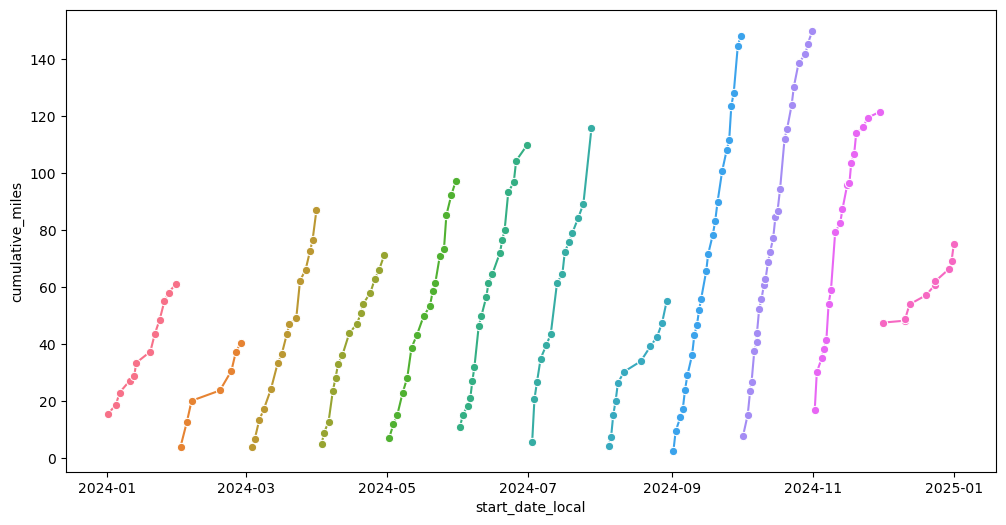

In [16]:
#calculate cumulative miles by month
df = df.sort_values('start_date')

df['cumulative_miles'] = df.groupby('month_name')['distance_miles'].cumsum()

#plot cumulative miles over time by month
plt.figure(figsize=(12, 6))
sns.lineplot(data = df[df.year == 2024], 
             x='start_date_local', y='cumulative_miles', 
             hue='month_name', marker='o', legend= None)

This plot illustrate how mileage is spread out through each month. In Februrary I was sick so the long pause after my 3rd run captures that period. A trend I can observe from this plot is several shorter runs, then one longer run every once in awhile. In december, the 

In [9]:
#summary statistics by day of week
df.groupby('day_of_week').agg({'upload_id':'count','distance_miles':['mean','sum','min','max','median']})

upload_id distance_miles                                   \
                count           mean         sum       min        max   
day_of_week                                                             
Friday             26       4.771711  124.064487  1.885612   9.692207   
Monday             33       3.995410  131.848526  1.270020   7.237543   
Saturday           22       7.055583  155.222825  0.912794  18.027278   
Sunday             38       8.018855  304.716486  1.617615  26.673220   
Thursday           34       5.689467  193.441864  2.335671  12.636014   
Tuesday            38       4.949984  188.099379  0.646661   8.456673   
Wednesday          24       4.822015  115.728360  1.821549  15.124792   

                       
               median  
day_of_week            
Friday       4.037016  
Monday       3.547531  
Saturday     4.816309  
Sunday       6.454460  
Thursday     5.231540  
Tuesday      4.820720  
Wednesday    4.222962

<Axes: xlabel='count', ylabel='month_name'>

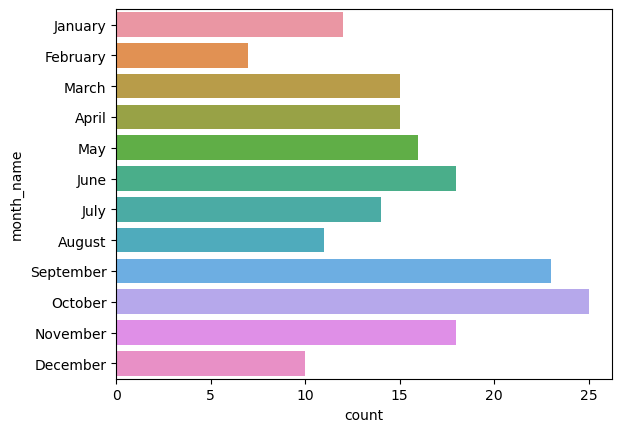

In [18]:
sns.countplot(df[df.year == 2024], y="month_name")

In [11]:
# # Create 'time_of_day' column based on hour partitions
# df['time_of_day'] = pd.cut(df['hour'], bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'], right=False)

# df.groupby('time_of_day').count()

<Axes: xlabel='hour', ylabel='Count'>

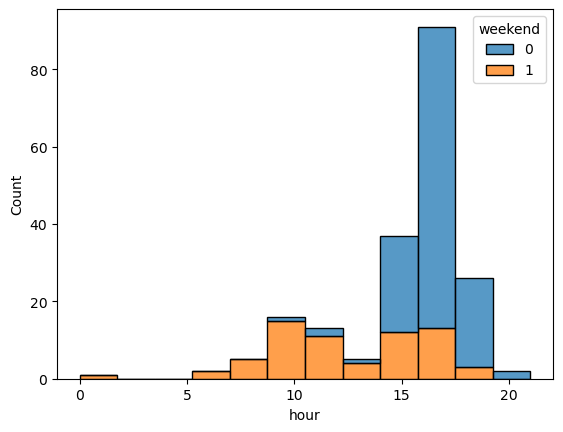

In [12]:
sns.histplot(df[df.start_date >= '01-01-2024'], 
             x="hour", bins = 12, hue = 'weekend', multiple="stack")

This is an interesting plot because it shows that weekdays are typically constrained to after working hours. Conversely weekends tend to vary considerably

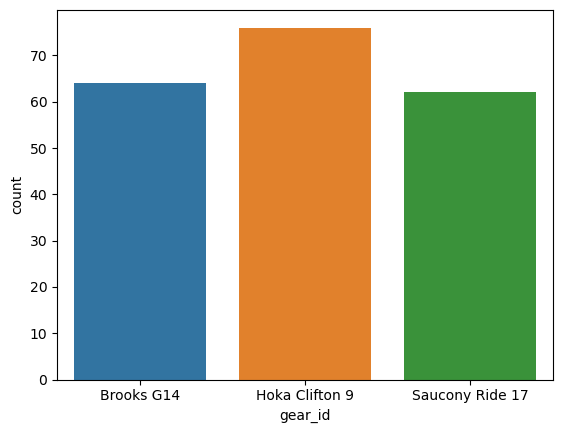

In [13]:
import seaborn as sns
sns.countplot(x="gear_id", data=df);

In [14]:
# df[df.isna().any(axis=1)]